<a href="https://www.quantrocket.com"><img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png"></a>

# Welcome to QuantRocket! 

### Start with this 5-minute interactive tour for new users:

1. [Python API first steps](Python-Intro.ipynb) - Intro to QuantRocket's Python API
2. [CLI first steps](CLI-Intro.ipynb) - Get to know the command line interface
3. [Logging first steps](Logging-Intro.ipynb) - Learn how logging works
4. [Clone sample code](Clone-Intro.ipynb) - Get some code into your deployment
5. [Code Editor](Code-Editor.ipynb) - Intro to the JupyterLab Code Editor

### Activate the software:

* [Enter your license key](Activate.ipynb) - Use the Python API to enter your license key

### Go deeper with a full tutorial:

Visit the [Code library](https://www.quantrocket.com/code/) to find step-by-step interactive tutorials that you can clone into your deployment. The tutorials below do not require a QuantRocket subscription.

#### Equities

##### Moonshot Intro

Introductory tutorial for Moonshot demonstrating data collection, universe selection, and backtesting of an end-of-day momentum strategy. Uses free sample data.

In [ ]:
from quantrocket.codeload import clone
clone("moonshot-intro")

##### Zipline Intro

Introductory tutorial for Zipline demonstrating data collection, interactive research, and backtesting of a momentum strategy for equities. Uses free sample data.

In [ ]:
from quantrocket.codeload import clone
clone("zipline-intro")

#### FX 

##### FX Business Day

Intraday FX strategy that exploits the tendency of currencies to depreciate during local business hours and appreciate during foreign business hours. Uses EUR.USD with hourly data from Interactive Brokers. Requires an Interactive Brokers account.

In [ ]:
from quantrocket.codeload import clone
clone("fx-bizday")

#### Futures

##### Intraday Futures Calendar Spreads

Intraday trading strategy for futures calendar spreads. Uses crude oil futures and 1-minute bid/ask bars from Interactive Brokers with a Bollinger Band mean reversion strategy. Runs in Moonshot. Demonstrates using exchange native spreads for live/paper trading, and non-native spreads for backtesting. Requires an Interactive Brokers account.

In [ ]:
from quantrocket.codeload import clone
clone("calspread")

In [ ]:
41676d62-de2a-11ee-84ed-03afac5e87ba

In [83]:
from quantrocket.license import set_license
set_license('4f764ca8-dfc7-11ee-9a2f-2ff325cc29f9')

{'licensekey': '4f76........29f9', 'software_license': {}}

In [84]:
from quantrocket.master import collect_usstock_listings
collect_usstock_listings()

{'status': 'success', 'msg': 'already up-to-date'}

In [85]:
import pandas as pd

In [86]:
from quantrocket.master import get_securities
securities = get_securities(symbols='AAPL', fields=['Sid','Symbol','Exchange'], vendors='usstock')
securities

HTTPError: ('500 Server Error: Internal Server Error for url: http://houston/master/securities.csv?symbols=AAPL&vendors=usstock&fields=Sid&fields=Symbol&fields=Exchange', {'status': 'error', 'msg': 'an unhandled exception occurred, please check flightlog for the traceback', 'error': 'the JSON object must be str, bytes or bytearray, not NoneType'})

In [40]:
from quantrocket.zipline import create_usstock_bundle
create_usstock_bundle("usstock-free-1min",free=True)

HTTPError: ('400 Client Error: BAD REQUEST for url: http://houston/zipline/bundles/usstock-free-1min?ingest_type=usstock&free=True', {'status': 'error', 'msg': 'bundle usstock-free-1min already exists'})

In [41]:
from quantrocket.zipline import ingest_bundle
ingest_bundle("usstock-free-1min")

{'status': 'the data will be ingested asynchronously'}

In [43]:
from quantrocket import get_prices
daily_closes=get_prices('usstock-free-1min',data_frequency='daily',sids='FIBBG000B9XRY4',start_date='2023-01-01',end_date='2023-12-31',fields='Close')

HTTPError: ('400 Client Error: BAD REQUEST for url: http://houston/zipline/bundles/data/usstock-free-1min.csv?start_date=2023-01-01&end_date=2023-12-31&data_frequency=daily&sids=FIBBG000B9XRY4&fields=Close', {'status': 'error', 'msg': "('500 Server Error: Internal Server Error for url: http://houston/master/securities.csv?sids=FIBBG000B9XRY4&fields=Sid', {'status': 'error', 'msg': 'an unhandled exception occurred, please check flightlog for the traceback', 'error': 'the JSON object must be str, bytes or bytearray, not NoneType'})"})

In [14]:
pip install yfinance


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install pandas



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [57]:
import matplotlib.pyplot as plt


In [58]:
import yfinance as yf

# Download AAPL data from '2023-01-01' to '2023-12-31'
aapl_data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

# Access daily close prices
daily_closes = aapl_data['Close']

print(daily_closes)

[*********************100%%**********************]  1 of 1 completed

Date
2023-01-03    125.070000
2023-01-04    126.360001
2023-01-05    125.019997
2023-01-06    129.619995
2023-01-09    130.149994
                 ...    
2023-12-22    193.600006
2023-12-26    193.050003
2023-12-27    193.149994
2023-12-28    193.580002
2023-12-29    192.529999
Name: Close, Length: 250, dtype: float64


In [59]:
type(daily_closes)

pandas.core.series.Series

In [60]:
import pandas as pd
close_values=pd.DataFrame(daily_closes)

In [61]:
close_values = close_values.reset_index(drop=False).rename(columns={'index': 'Date'})
close_values

,Date,Close
0,2023-01-03,125.070000
1,2023-01-04,126.360001
2,2023-01-05,125.019997
3,2023-01-06,129.619995
4,2023-01-09,130.149994
...,...,...
245,2023-12-22,193.600006
246,2023-12-26,193.050003
247,2023-12-27,193.149994
248,2023-12-28,193.580002


In [62]:
close_values["Close"]

0      125.070000
1      126.360001
2      125.019997
3      129.619995
4      130.149994
          ...    
245    193.600006
246    193.050003
247    193.149994
248    193.580002
249    192.529999
Name: Close, Length: 250, dtype: float64

In [63]:
close_values['Return'] = close_values['Close'].pct_change()          #finding the return values
def classify_state(row):   #function for the state classification
  if pd.isna(row['Return']):  # Check if return is missing
    return None
  elif row['Return'] >= 0.01:
    return 1
  elif row['Return'] > -0.01:
    return 0
  else:
    return -1
close_values['State'] = close_values.apply(classify_state, axis=1)

               

In [64]:
close_values

,Date,Close,Return,State
0,2023-01-03,125.070000,NaN,NaN
1,2023-01-04,126.360001,0.010314,1.0
2,2023-01-05,125.019997,-0.010605,-1.0
3,2023-01-06,129.619995,0.036794,1.0
4,2023-01-09,130.149994,0.004089,0.0
...,...,...,...,...
245,2023-12-22,193.600006,-0.005547,0.0
246,2023-12-26,193.050003,-0.002841,0.0
247,2023-12-27,193.149994,0.000518,0.0
248,2023-12-28,193.580002,0.002226,0.0


In [65]:
close_values['State'].value_counts()

 0.0    158
 1.0     56
-1.0     35
Name: State, dtype: int64

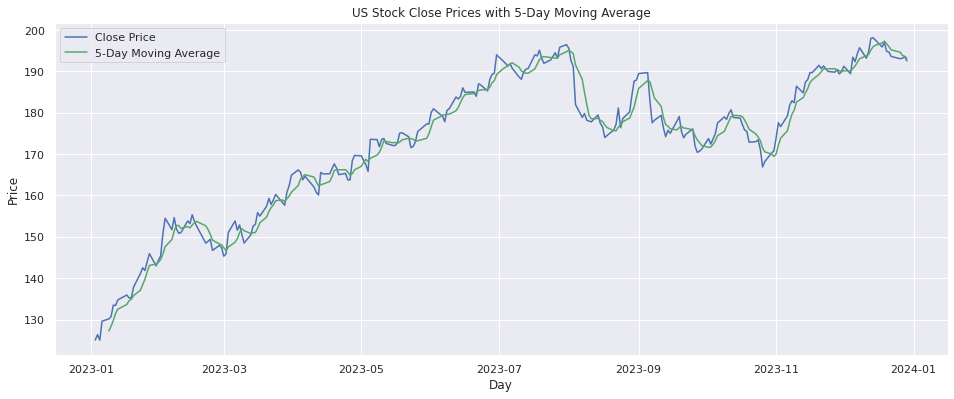

In [68]:
moving_average = []
for i in range(len(close_values)):                          #Finding 5-Days Moving Average(MA)
  if i < 4:
    moving_average.append(None)
  else:
    window = close_values['Close'][i-4:i+1]
    average = sum(window) / len(window)
    moving_average.append(average)

plt.plot(close_values['Date'],close_values['Close'], label='Close Price')
plt.plot(close_values['Date'][4:],moving_average[4:], label='5-Day Moving Average')


plt.xlabel('Day')
plt.ylabel('Price')
plt.title('US Stock Close Prices with 5-Day Moving Average')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

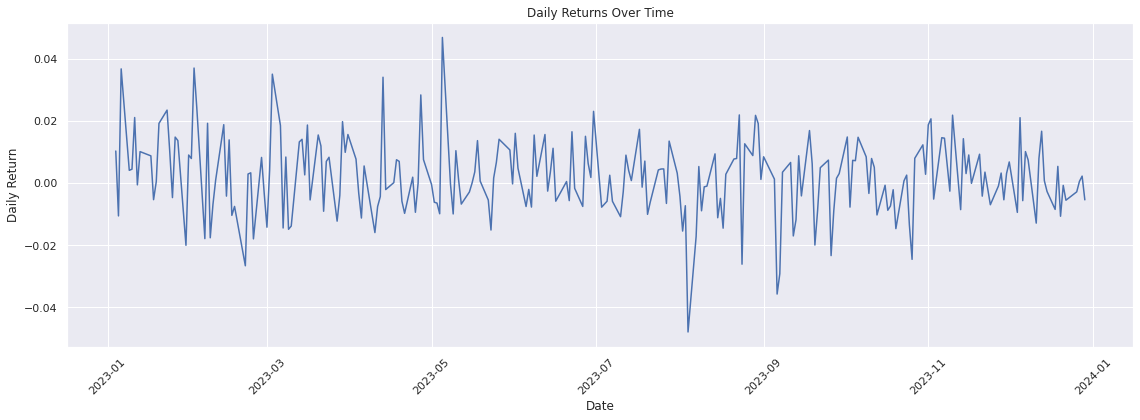

In [51]:
plt.plot(close_values['Date'],close_values['Return'])
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Daily Returns Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

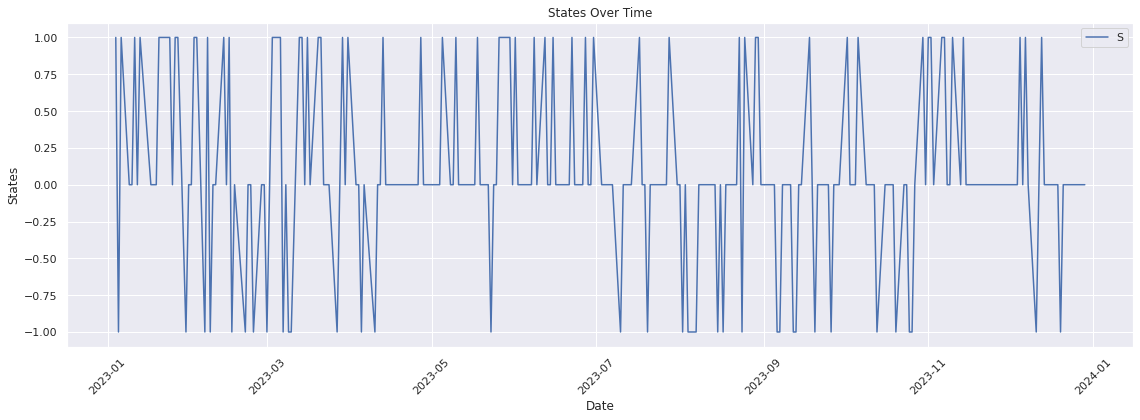

In [70]:

plt.plot(close_values['Date'],close_values['State'])
plt.legend('States')
plt.xlabel('Date')
plt.ylabel('States')
plt.title('States Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def calculate_transition_distribution(data):     #finding the transition probabilities
 
  transition_counts = {(0,1):0,(0,-1):0,(1,0):0,(-1,0):0,(1,-1):0,(-1,0):0,(0,0):0}
  previous_state = None  

  for index, row in data.iterrows():
    current_state = row['State']

    if pd.isna(current_state):    #skipping the first day
      continue

    if previous_state is not None:
      transition_counts[(previous_state, current_state)] = transition_counts.get((previous_state, current_state), 0) + 1

    previous_state = current_state 

 
  transition_probs = {}
  for (prev_state, curr_state), count in transition_counts.items():
    total_transitions_from_prev = sum(value for key,value in transition_counts.items() if key[0] == prev_state)
    transition_probs[(prev_state, curr_state)] = count / total_transitions_from_prev  #finding the probability

  return transition_probs

In [90]:
def make_buy_decision(current_state, prev_state):
  if ((current_state == 1 and prev_state == 0) or (current_state==-1 and prev_state==0)):
    return True

  return False



transition_probs = calculate_transition_distribution(close_values)

portfolio_value = 0
buy_decisions = []


for index, row in close_values.iterrows():
  current_state = row['State']
  prev_state = close_values.loc[index - 1, 'State'] if index > 0 else None  #skipping first day
    
  if(make_buy_decision(current_state, prev_state)):           
      buy_decisions.append(index)
      if current_state == 1:
          portfolio_value += 1                           #calculating the portfolio value
      elif current_state == -1:
          portfolio_value -= 1
  if(index%10==0):                                      #displaying the portfolio values with a 10 days interval 
      print(f"Day: {row['Date']}, State: {current_state}, Portfolio Value: {portfolio_value}")
print(f"Day: {row['Date']}, State: {current_state}, Portfolio Value: {portfolio_value}")

print("\nTransition Probabilities:")
print("       1    0     -1")
for i in [1,0,-1]:
    print(" "+str(i),end="    ")
    for j in [1,0,-1]:
        print(round(transition_probs[(i,j)],2), end="   ")
    print()


print("\nBuy Decisions:")
for buy_decision in buy_decisions:
  print(buy_decision,end=" , ")

Day: 2023-01-03 00:00:00, State: nan, Portfolio Value: 0
Day: 2023-01-18 00:00:00, State: 0.0, Portfolio Value: 2
Day: 2023-02-01 00:00:00, State: 0.0, Portfolio Value: 4
Day: 2023-02-15 00:00:00, State: 1.0, Portfolio Value: 7
Day: 2023-03-02 00:00:00, State: 0.0, Portfolio Value: 4
Day: 2023-03-16 00:00:00, State: 1.0, Portfolio Value: 5
Day: 2023-03-30 00:00:00, State: 0.0, Portfolio Value: 6
Day: 2023-04-14 00:00:00, State: 0.0, Portfolio Value: 6
Day: 2023-04-28 00:00:00, State: 0.0, Portfolio Value: 7
Day: 2023-05-12 00:00:00, State: 0.0, Portfolio Value: 9
Day: 2023-05-26 00:00:00, State: 1.0, Portfolio Value: 10
Day: 2023-06-12 00:00:00, State: 1.0, Portfolio Value: 13
Day: 2023-06-27 00:00:00, State: 1.0, Portfolio Value: 16
Day: 2023-07-12 00:00:00, State: 0.0, Portfolio Value: 16
Day: 2023-07-26 00:00:00, State: 0.0, Portfolio Value: 16
Day: 2023-08-09 00:00:00, State: 0.0, Portfolio Value: 15
Day: 2023-08-23 00:00:00, State: 1.0, Portfolio Value: 14
Day: 2023-09-07 00:00:00

In [26]:
len(buy_decisions)

63

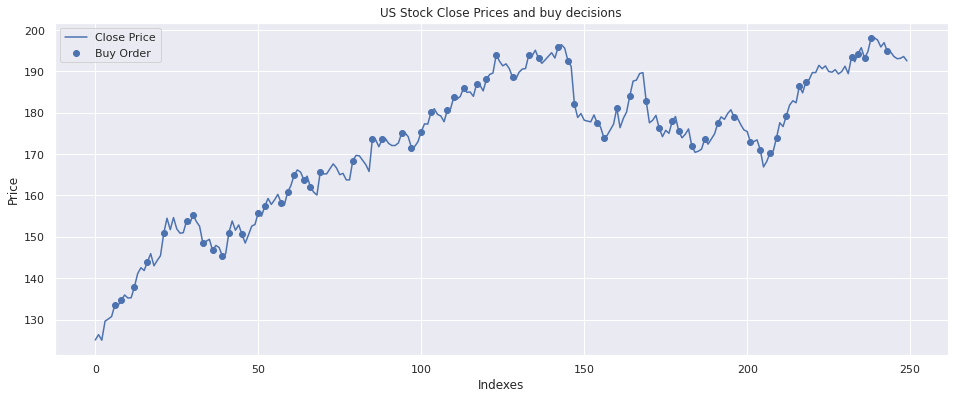

In [77]:
plt.plot(close_values['Close'], label='Close Price')
plt.scatter(buy_decisions,[close_values.loc[i, 'Close'] for i in buy_decisions],label='Buy Order')
plt.xlabel('Indexes')
plt.ylabel('Price')
plt.title('US Stock Close Prices and buy decisions')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()